In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
s = pd.read_excel('../data/shipments.xlsx')

In [18]:
sl = pd.read_excel('../data/shipment_lines.xlsx')

In [19]:
po = pd.read_excel('../data/part_operations.xlsx')

In [20]:
p = pd.read_excel('../data/parts.xlsx')

In [21]:
sol = pd.read_excel('../data/sales_order_lines.xlsx')

In [22]:
sojl = pd.read_excel('../data/sales_order_job_links.xlsx')

In [23]:
so = pd.read_csv('../data/sales_order.csv')

In [24]:
jo2024 = pd.read_excel('../data/job_operations_2024.xlsx')

In [25]:
pa = pd.read_excel('../data/part_assemblies.xlsx')

In [26]:
j = pd.read_excel('../data/jobs.xlsx')

In [27]:
s.head()

,smp_shipment_id,smp_plant_id,smp_ship_date,smp_customer_organization_id,smp_arinvoice_location_id,smp_arinvoice_contact_id,smp_ship_organization_id,smp_ship_location_id,smp_ship_contact_id,smp_shipping_method_id,...,smp_weight_total,smp_posted_to_gl,smp_posted_date,smp_reversal_entry,smp_reversed,smp_shipment_idnumber,smp_upsbilling_option,smp_fed_ex_billing_option,smp_created_by,smp_created_date
0,37515,NaN,2023-01-03 09:06:33,M030-MORGO,NaN,KimHo,M030-MORGO,1,NaN,MWS-T,...,0.0,True,2023-01-03,False,False,NaN,NaN,NaN,shope,2023-01-03 09:06:33
1,37517,NaN,2023-01-03 09:08:29,M030-MORGO,NaN,KimHo,M030-MORGO,1,NaN,MWS-T,...,0.0,True,2023-01-03,False,False,NaN,NaN,NaN,shope,2023-01-03 09:08:29
2,37518,NaN,2023-01-03 09:10:26,M030-MORGO,NaN,KimHo,M030-MORGO,1,NaN,MWS-T,...,0.0,True,2023-01-03,False,False,NaN,NaN,NaN,shope,2023-01-03 09:10:26
3,37528,NaN,2023-01-03 09:16:05,M030-MORGO,NaN,KimHo,M030-MORGO,1,NaN,MWS-T,...,0.0,True,2023-01-03,False,False,NaN,NaN,NaN,shope,2023-01-03 09:16:05
4,37529,NaN,2023-01-03 09:16:37,M030-MORGO,NaN,KimHo,M030-MORGO,1,NaN,MWS-T,...,0.0,True,2023-01-03,False,False,NaN,NaN,NaN,shope,2023-01-03 09:16:37


In [28]:
s.columns

Index(['smp_shipment_id', 'smp_plant_id', 'smp_ship_date',
       'smp_customer_organization_id', 'smp_arinvoice_location_id',
       'smp_arinvoice_contact_id', 'smp_ship_organization_id',
       'smp_ship_location_id', 'smp_ship_contact_id', 'smp_shipping_method_id',
       'smp_shipping_payment_type_id', 'smp_freight_charge',
       'smp_freight_charge_foreign', 'smp_freight_total',
       'smp_freight_total_foreign', 'smp_shipping_comments_text',
       'smp_print_packing_slip', 'smp_print_labels', 'smp_tracking_number',
       'smp_shipment_subtotal', 'smp_shipment_subtotal_foreign',
       'smp_shipment_total', 'smp_shipment_total_foreign',
       'smp_weight_subtotal', 'smp_weight_total', 'smp_posted_to_gl',
       'smp_posted_date', 'smp_reversal_entry', 'smp_reversed',
       'smp_shipment_idnumber', 'smp_upsbilling_option',
       'smp_fed_ex_billing_option', 'smp_created_by', 'smp_created_date'],
      dtype='object')

In [29]:
s.shape

(12703, 34)

In [30]:
s['month']=s['smp_ship_date'].dt.month

In [31]:
import calendar
s['month'] = s['month'].apply(lambda x: calendar.month_abbr[x])

In [32]:
s['week']=s['smp_ship_date'].dt.isocalendar().week

In [33]:
s['month'].value_counts()

month
Oct    1342
Aug    1294
Mar    1279
May    1240
Jan    1151
Apr    1150
Sep    1129
Jul    1096
Feb    1055
Jun    1043
Nov     629
Dec     295
Name: count, dtype: int64

In [34]:
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Text(0, 0.5, 'Shipment Count')

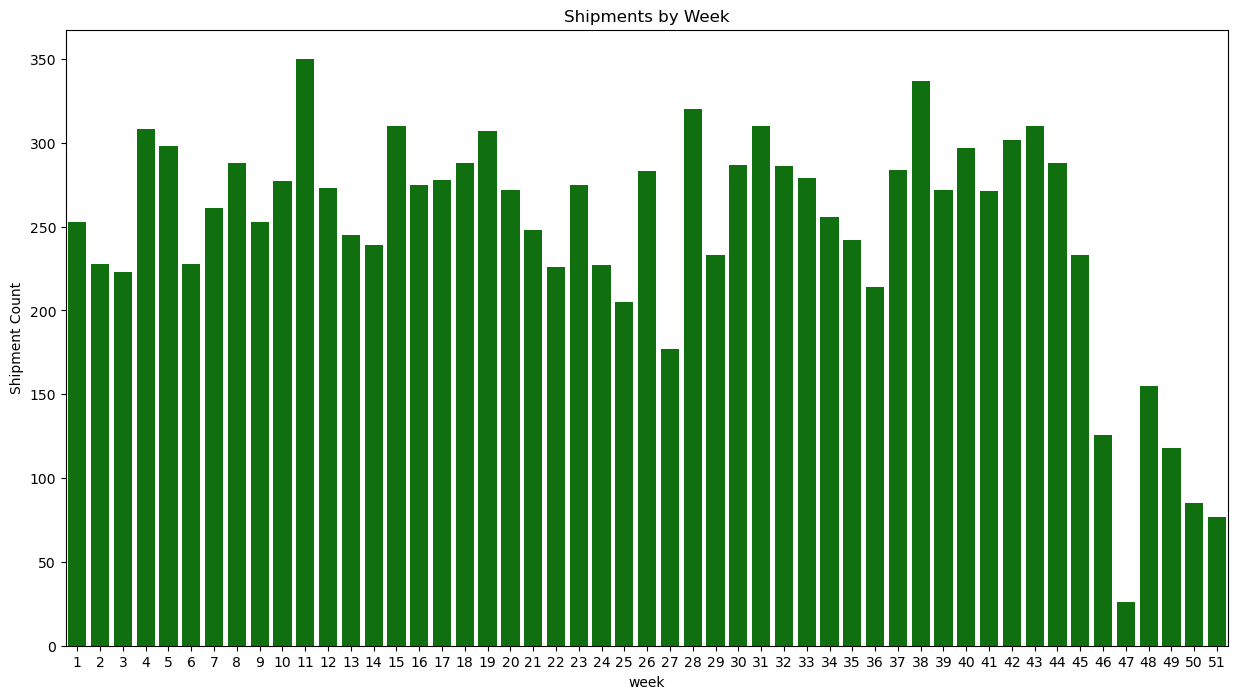

In [35]:
plt.figure(figsize=(15,8))

sns.countplot(x='week', data=s, color='green')
plt.title('Shipments by Week')
plt.ylabel('Shipment Count')

decrease through May and June, 
also decrease through August



Week 47 =Sunday, November 20, 2023 
to Saturday, November 63, 203, Thanksgiving! 
no.1 = March 13 to March 19, 2023
no.2 = September 18 to September 24, 2023
no.3 = July 10 to July 16, 2023
4

C:\Users\graft\AppData\Local\Temp\ipykernel_8732\1386816224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=s, order=Months, palette='Set1')


Text(0, 0.5, 'Shipment Count')

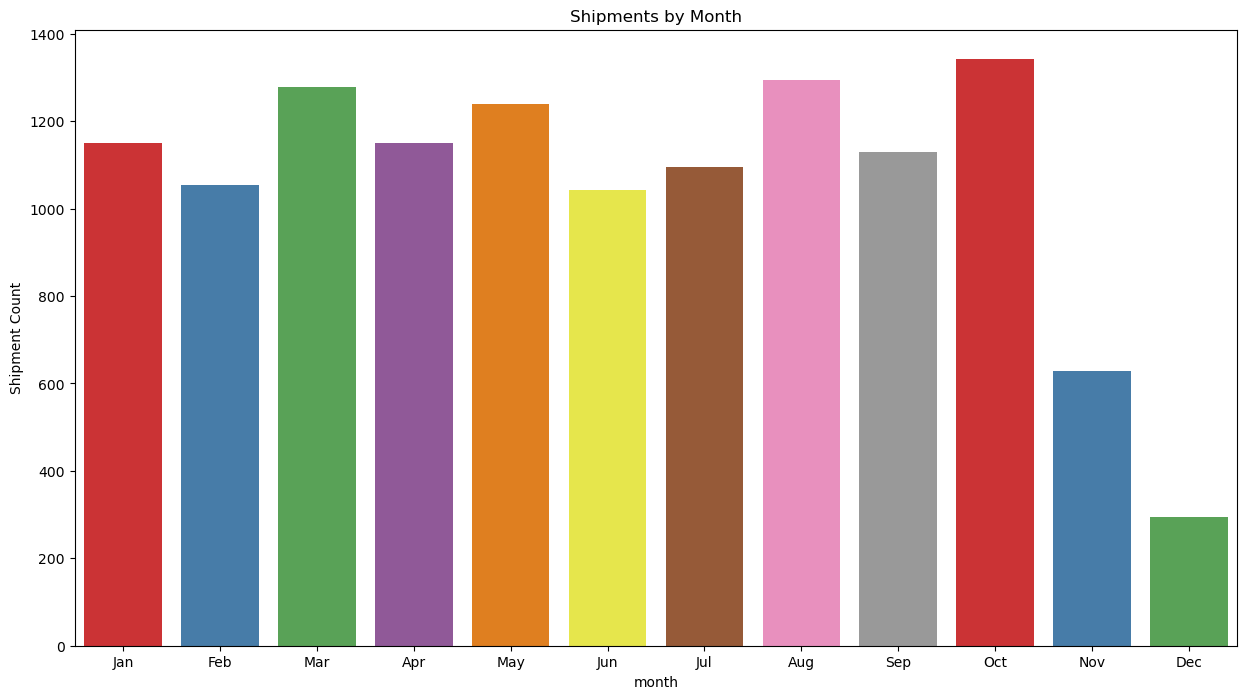

In [37]:
plt.figure(figsize=(15,8))
sns.countplot(x='month', data=s, order=Months, palette='Set1')
plt.title('Shipments by Month')
plt.ylabel('Shipment Count')

In [38]:
s.columns

Index(['smp_shipment_id', 'smp_plant_id', 'smp_ship_date',
       'smp_customer_organization_id', 'smp_arinvoice_location_id',
       'smp_arinvoice_contact_id', 'smp_ship_organization_id',
       'smp_ship_location_id', 'smp_ship_contact_id', 'smp_shipping_method_id',
       'smp_shipping_payment_type_id', 'smp_freight_charge',
       'smp_freight_charge_foreign', 'smp_freight_total',
       'smp_freight_total_foreign', 'smp_shipping_comments_text',
       'smp_print_packing_slip', 'smp_print_labels', 'smp_tracking_number',
       'smp_shipment_subtotal', 'smp_shipment_subtotal_foreign',
       'smp_shipment_total', 'smp_shipment_total_foreign',
       'smp_weight_subtotal', 'smp_weight_total', 'smp_posted_to_gl',
       'smp_posted_date', 'smp_reversal_entry', 'smp_reversed',
       'smp_shipment_idnumber', 'smp_upsbilling_option',
       'smp_fed_ex_billing_option', 'smp_created_by', 'smp_created_date',
       'month', 'week'],
      dtype='object')

In [39]:
j.columns

Index(['jmp_job_id', 'jmp_plant_id', 'jmp_production_due_date',
       'jmp_customer_organization_id', 'jmp_job_date', 'jmp_part_id',
       'jmp_part_revision_id', 'jmp_part_ware_house_location_id',
       'jmp_part_bin_id', 'jmp_part_short_description',
       'jmp_part_long_description_text', 'jmp_order_quantity',
       'jmp_inventory_quantity', 'jmp_production_quantity',
       'jmp_scheduled_start_date', 'jmp_scheduled_start_hour',
       'jmp_scheduled_due_date', 'jmp_scheduled_due_hour',
       'jmp_time_and_material', 'jmp_planning_complete',
       'jmp_planner_employee_id', 'jmp_schedule_complete',
       'jmp_released_to_floor', 'jmp_on_hold', 'jmp_ready_to_print',
       'jmp_production_complete', 'jmp_quantity_completed',
       'jmp_completed_date', 'jmp_quantity_shipped',
       'jmp_quantity_received_to_inventory', 'jmp_source_method_id',
       'jmp_source_revision_id', 'jmp_production_notes_text', 'jmp_documents',
       'jmp_closed', 'jmp_closed_date', 'jmp_ship_org

In [40]:
q4 = j[['jmp_production_due_date','jmp_completed_date', 'jmp_part_id']]

In [41]:
j

,jmp_job_id,jmp_plant_id,jmp_production_due_date,jmp_customer_organization_id,jmp_job_date,jmp_part_id,jmp_part_revision_id,jmp_part_ware_house_location_id,jmp_part_bin_id,jmp_part_short_description,...,jmp_created_by,jmp_created_date,ujmp_pfmrelease_date,ujmp_hold_reason,ujmp_hold_owner,ujmp_bomvalidated,ujmp_nest_name,ujmp_qchold,ujmp_qchold_dept,ujmp_first_run
0,28338-0001-001,NaN,2023-03-09,M030-MORGO,2023-02-10,M030-0350,H,CHATT,BIN A,177041405 DOOR POCKET PANEL RH (*CUST SUPP MAT*),...,bsinclair,2023-02-10 15:55:23,2023-03-06 11:23:24,NaN,0,True,NaN,False,0,False
1,27622-0001-001,NaN,2023-02-07,M030-MORGO,2023-01-09,M030-0350,H,CHATT,BIN A,177041405 DOOR POCKET PANEL RH (*CUST SUPP MAT*),...,bsinclair,2023-01-09 15:05:29,2023-01-31 20:48:55,NaN,0,True,NaN,False,0,False
2,27652-0001-001,NaN,2023-02-07,M030-MORGO,2023-01-11,M030-0463,A,CHATT,BIN A,228053400 PNL BK AL.188 X 20.01 X 95 RH,...,bsinclair,2023-01-11 10:57:53,2023-02-01 21:50:24,NaN,0,True,NaN,False,0,False
3,27653-0001-001,NaN,2023-02-07,M030-MORGO,2023-01-11,M030-0382,REL,CHATT,BIN A,PROTO20094 BRKT LFT ASST LH,...,bsinclair,2023-01-11 10:59:23,2023-02-02 14:38:24,NaN,0,True,NaN,False,0,False
4,27654-0001-001,NaN,2023-02-07,M030-MORGO,2023-01-11,M030-0345,B,CHATT,BIN A,097016404 SUPT ANGLE HOOD LIFT RH UPS HOOD FCC...,...,bsinclair,2023-01-11 11:00:26,2023-02-02 16:17:24,NaN,0,True,NaN,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14810,31256-0001-001,NaN,2023-09-05,M030-MORGO,2023-08-09,M030-0254,E,CHATT,BIN A,005774400 ANG AL MTG .125 X 6.81 X 107.12,...,bsinclair,2023-08-09 16:29:43,2023-08-29 21:53:24,NaN,0,True,NaN,False,0,False
14811,31259-0001-001,NaN,2023-09-04,M030-MORGO,2023-08-10,M030-0460,0,CHATT,BIN A,117032400 W/BX WRAPPER 44'' 88W FCC,...,bsinclair,2023-08-10 10:45:35,2023-08-29 19:04:12,NaN,0,True,NaN,False,0,False
14812,31261-0001-001,NaN,2023-09-05,M030-MORGO,2023-08-10,M030-0274,C,CHATT,BIN A,001710410 ROOF BOW,...,bsinclair,2023-08-10 10:50:05,2023-08-29 13:50:24,NaN,0,True,823230,False,0,False
14813,31309-0001-001,NaN,2023-09-05,M030-MORGO,2023-08-14,M030-0203,D,CHATT,BIN A,087032404 WHEEL BX END PANEL LH,...,bsinclair,2023-08-14 11:57:59,2023-08-30 15:16:12,NaN,0,True,NaN,False,0,False


In [42]:
q4b = p[['imp_part_id', 'imp_short_description']]

In [43]:
q4= pd.merge(q4, q4b, left_on='jmp_part_id', right_on='imp_part_id')

In [44]:
q4['on_time_delivery']= ((q4['jmp_production_due_date'] - q4['jmp_completed_date']).dt.total_seconds() / (24 * 3600)).round(2)


In [45]:
q4['month']=q4['jmp_production_due_date'].dt.month

In [46]:
q4['week']=q4['jmp_production_due_date'].dt.isocalendar().week

In [47]:
q4

,jmp_production_due_date,jmp_completed_date,jmp_part_id,imp_part_id,imp_short_description,on_time_delivery,month,week
0,2023-03-09,2023-03-08 09:28:34,M030-0350,M030-0350,177041405 DOOR POCKET PANEL RH (*CUST SUPP MAT*),0.61,3.0,10
1,2023-02-07,2023-02-04 07:39:37,M030-0350,M030-0350,177041405 DOOR POCKET PANEL RH (*CUST SUPP MAT*),2.68,2.0,6
2,2023-02-07,2023-02-03 10:19:11,M030-0463,M030-0463,228053400 PNL BK AL.188 X 20.01 X 95 RH,3.57,2.0,6
3,2023-02-07,2023-01-17 07:11:25,M030-0382,M030-0382,217016401 PROTO20094 BRKT LFT ASST LH,20.70,2.0,6
4,2023-02-07,2023-01-17 07:01:02,M030-0345,M030-0345,097016404 SUPT ANGLE HOOD LIFT RH UPS HOOD FCC...,20.71,2.0,6
...,...,...,...,...,...,...,...,...
14810,2023-09-05,2023-08-30 00:00:00,M030-0254,M030-0254,005774400 ANG AL MTG .125 X 6.81 X 107.12,6.00,9.0,36
14811,2023-09-04,2023-08-22 09:43:04,M030-0460,M030-0460,117032400 W/BX WRAPPER 44'' 88W FCC,12.60,9.0,36
14812,2023-09-05,2023-08-30 00:00:00,M030-0274,M030-0274,001710410 ROOF BOW,6.00,9.0,36
14813,2023-09-05,2023-08-28 06:03:30,M030-0203,M030-0203,087032404 WHEEL BX END PANEL LH,7.75,9.0,36


In [48]:
q4['month']=q4['month'].fillna(-1).astype(int)

In [49]:
q4['month'] = q4['month'].apply(lambda x: calendar.month_abbr[x])

In [50]:
q4

,jmp_production_due_date,jmp_completed_date,jmp_part_id,imp_part_id,imp_short_description,on_time_delivery,month,week
0,2023-03-09,2023-03-08 09:28:34,M030-0350,M030-0350,177041405 DOOR POCKET PANEL RH (*CUST SUPP MAT*),0.61,Mar,10
1,2023-02-07,2023-02-04 07:39:37,M030-0350,M030-0350,177041405 DOOR POCKET PANEL RH (*CUST SUPP MAT*),2.68,Feb,6
2,2023-02-07,2023-02-03 10:19:11,M030-0463,M030-0463,228053400 PNL BK AL.188 X 20.01 X 95 RH,3.57,Feb,6
3,2023-02-07,2023-01-17 07:11:25,M030-0382,M030-0382,217016401 PROTO20094 BRKT LFT ASST LH,20.70,Feb,6
4,2023-02-07,2023-01-17 07:01:02,M030-0345,M030-0345,097016404 SUPT ANGLE HOOD LIFT RH UPS HOOD FCC...,20.71,Feb,6
...,...,...,...,...,...,...,...,...
14810,2023-09-05,2023-08-30 00:00:00,M030-0254,M030-0254,005774400 ANG AL MTG .125 X 6.81 X 107.12,6.00,Sep,36
14811,2023-09-04,2023-08-22 09:43:04,M030-0460,M030-0460,117032400 W/BX WRAPPER 44'' 88W FCC,12.60,Sep,36
14812,2023-09-05,2023-08-30 00:00:00,M030-0274,M030-0274,001710410 ROOF BOW,6.00,Sep,36
14813,2023-09-05,2023-08-28 06:03:30,M030-0203,M030-0203,087032404 WHEEL BX END PANEL LH,7.75,Sep,36


Text(0, 0.5, 'On Time in Days')

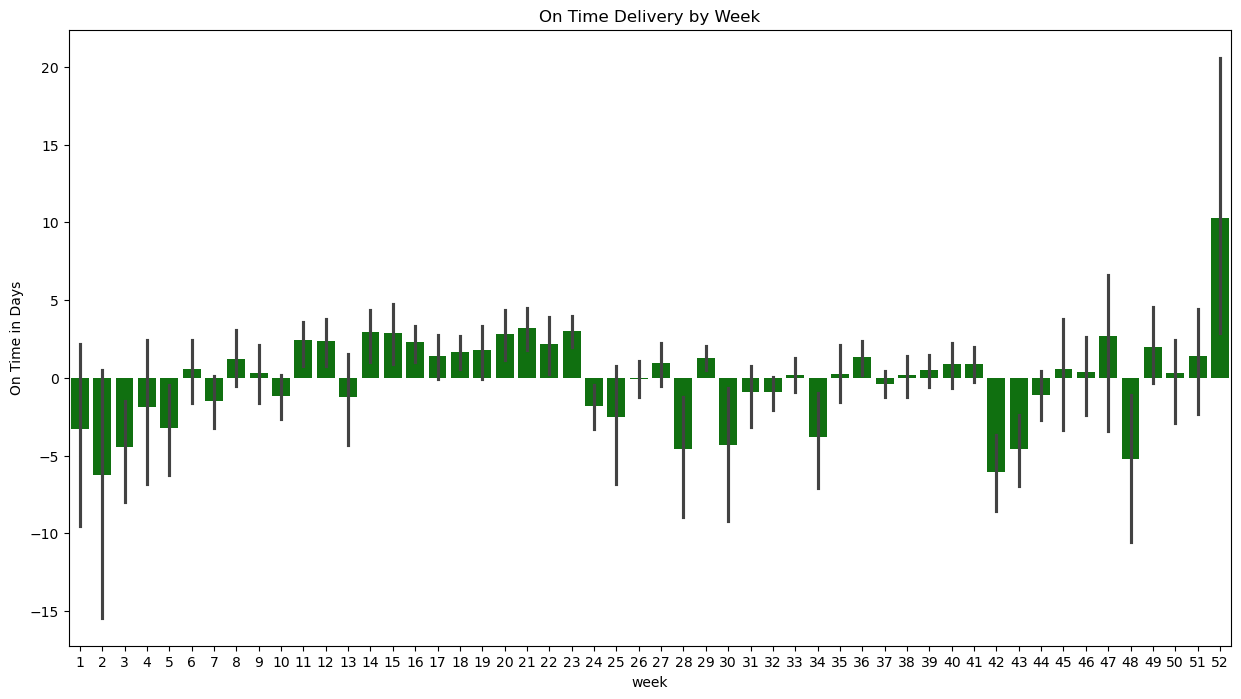

In [51]:
plt.figure(figsize=(15,8))

sns.barplot(x='week', y= 'on_time_delivery', data=q4, color='green')
plt.title('On Time Delivery by Week')
plt.ylabel('On Time in Days')

delays through month of January, and orders ahead of schedule in the final week in December

C:\Users\graft\AppData\Local\Temp\ipykernel_8732\3572252343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y= 'on_time_delivery', data=q4, order=Months, palette='Set1')


Text(0, 0.5, 'On Time in Days')

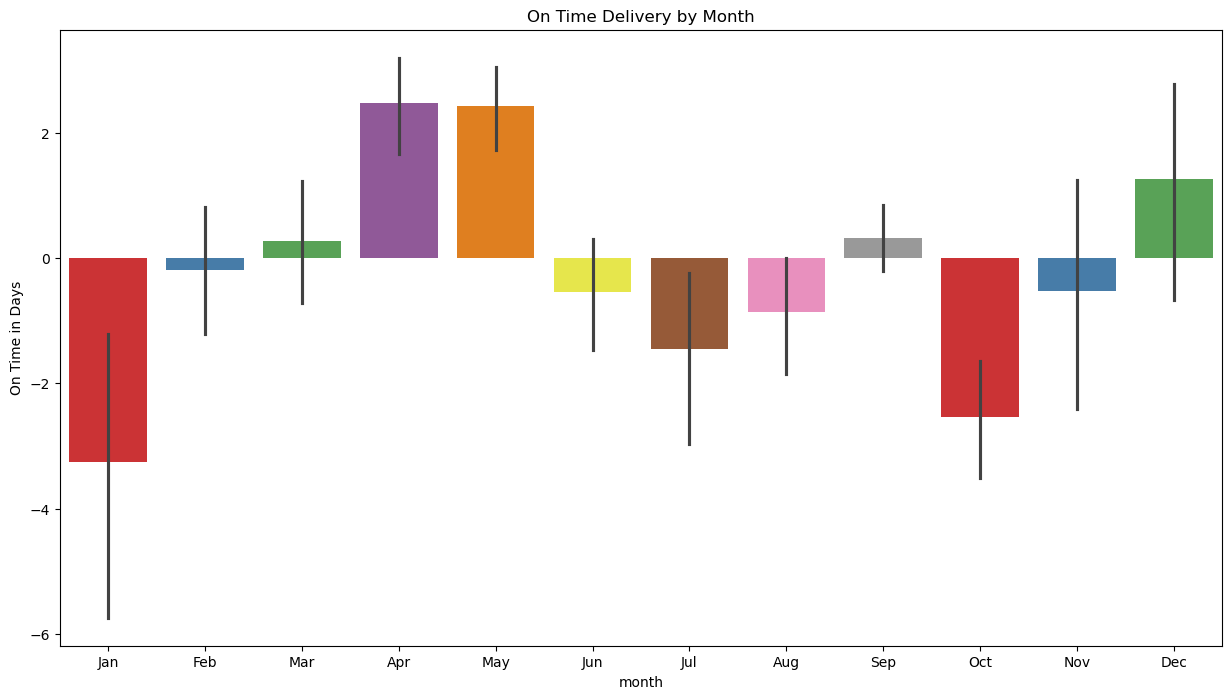

In [53]:
plt.figure(figsize=(15,8))

sns.barplot(x='month', y= 'on_time_delivery', data=q4, order=Months, palette='Set1')
plt.title('On Time Delivery by Month')
plt.ylabel('On Time in Days')

In [54]:
q4.loc[q4['on_time_delivery'] < 0]

,jmp_production_due_date,jmp_completed_date,jmp_part_id,imp_part_id,imp_short_description,on_time_delivery,month,week
14,2023-02-10,2023-02-15 07:47:27,M030-0325,M030-0325,98760307 STFNR LWR .102X7.74X28.18 RH,-5.32,Feb,6
15,2023-02-16,2023-02-16 06:51:30,M030-0337,M030-0337,157050407 *CUST SUPPLIED MAT. .102 59X96 ALUM*,-0.29,Feb,7
18,2023-02-16,2023-02-16 06:06:36,M030-0340,M030-0340,157041409 *CUST SUPPLIED MAT. .102 59X96 ALUM*,-0.25,Feb,7
19,2023-02-16,2023-02-16 06:21:15,M030-0341,M030-0341,177005412 *CUST SUPPLIED MAT. .102 59X96 ALUM*,-0.26,Feb,7
20,2023-02-16,2023-02-16 06:21:54,M030-0342,M030-0342,177005411 *CUST SUPPLIED MAT. .102 59X96 ALUM*,-0.27,Feb,7
...,...,...,...,...,...,...,...,...
14783,2023-08-02,2023-08-16 15:10:13,M030-0004,M030-0004,137147404 GDE ANG STKR (PLATED PART),-14.63,Aug,31
14788,2023-08-10,2023-08-10 13:08:09,M030-0400,M030-0400,208078401 C/P RR D/FLR,-0.55,Aug,32
14790,2023-08-09,2023-08-11 09:54:56,M030-0356,M030-0356,197147405 LINK LAT BHD (COATED PART),-2.41,Aug,32
14804,2023-08-14,2023-08-16 15:08:39,M030-0003,M030-0003,137147403 SLD STKR SEE DOOR REAR (PLATED PART),-2.63,Aug,33


In [55]:
delaylist= ['S025-0508', 'Y002-0605', 'Y002-0604','Y002-0631']

In [56]:
part_delay=q4.loc[q4['imp_part_id'].isin(delaylist)]

In [57]:
part_delay['on_time_delivery']=part_delay['on_time_delivery'].abs()

C:\Users\graft\AppData\Local\Temp\ipykernel_8732\1136990170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_delay['on_time_delivery']=part_delay['on_time_delivery'].abs()


In [58]:
part_delay['imp_part_id'].nunique()

4

C:\Users\graft\AppData\Local\Temp\ipykernel_8732\1662164546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='jmp_part_id', data=part_delay, palette='Set2')


Text(0, 0.5, 'Delay Count')

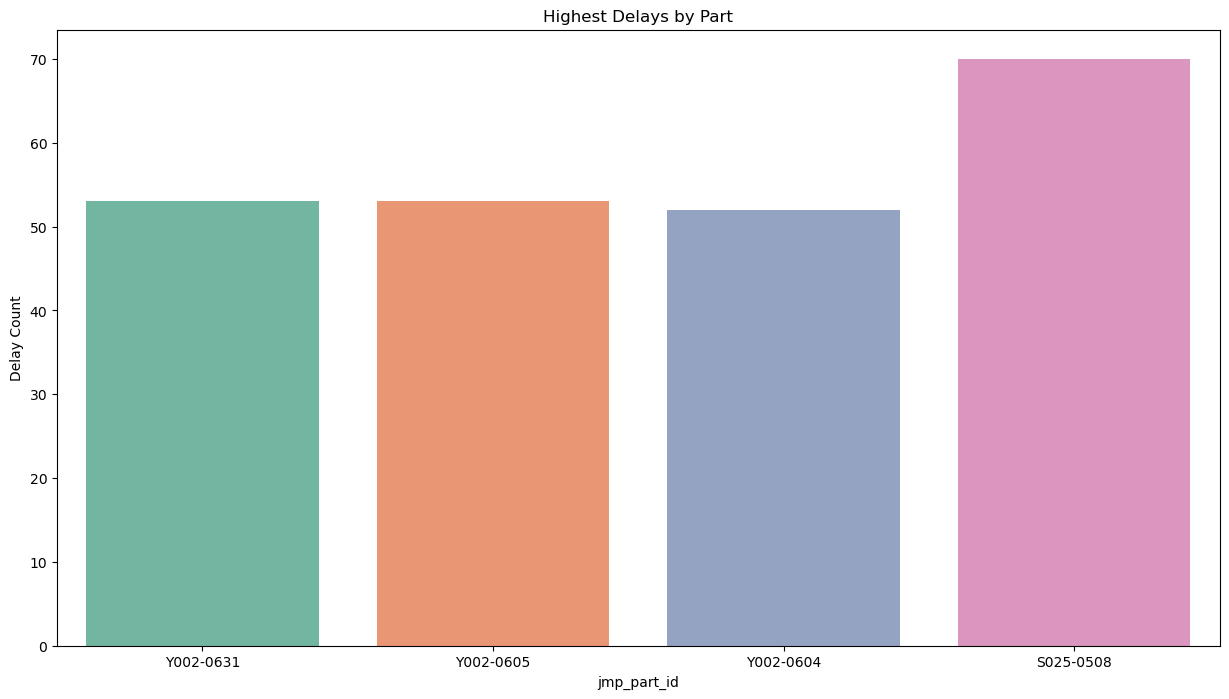

In [59]:
plt.figure(figsize=(15,8))

sns.countplot(x='jmp_part_id', data=part_delay, palette='Set2')
plt.title('Highest Delays by Part')
plt.ylabel('Delay Count')


S025- 0508 = 1418-61455-3-12650-C FRAME (REAR)	

In [61]:
part_delay

,jmp_production_due_date,jmp_completed_date,jmp_part_id,imp_part_id,imp_short_description,on_time_delivery,month,week
993,2023-05-22,2023-06-06 00:00:00,Y002-0631,Y002-0631,YT449800B-D-AO CUMMINS KIT 84SQFT,15.00,May,21
994,2023-06-12,2023-06-15 00:00:00,Y002-0631,Y002-0631,YT449800B-D-AO CUMMINS KIT 84SQFT,3.00,Jun,24
995,2023-07-31,2023-08-16 00:00:00,Y002-0605,Y002-0605,YT449800B-C-AO CUMMINS KIT 84 SQFT,16.00,Jul,31
1076,2023-07-31,2023-08-10 00:00:00,Y002-0631,Y002-0631,YT449800B-D-AO CUMMINS KIT 84SQFT,10.00,Jul,31
1110,2023-12-13,2023-12-14 00:00:00,Y002-0604,Y002-0604,YT449800B-B-AO CUMMINS KIT 84 SQFT,1.00,Dec,50
...,...,...,...,...,...,...,...,...
11662,2023-05-15,2023-06-06 00:00:00,S025-0508,S025-0508,1418-61455-3-12650-C FRAME (REAR),22.00,May,20
11663,2023-05-22,2023-06-06 00:00:00,S025-0508,S025-0508,1418-61455-3-12650-C FRAME (REAR),15.00,May,21
11664,2023-05-29,2023-06-12 00:00:00,S025-0508,S025-0508,1418-61455-3-12650-C FRAME (REAR),14.00,May,22
11665,2023-06-05,2023-06-30 00:00:00,S025-0508,S025-0508,1418-61455-3-12650-C FRAME (REAR),25.00,Jun,23


In [62]:
so.columns

Index(['omp_sales_order_id', 'omp_plant_id', 'omp_customer_organization_id',
       'omp_arinvoice_contact_id', 'omp_ship_location_id', 'omp_customer_po',
       'omp_requested_ship_date', 'omp_order_date', 'omp_shipping_method_id',
       'omp_shipping_payment_type_id', 'omp_payment_term_id',
       'omp_order_comments_text', 'omp_ready_to_print',
       'omp_full_order_subtotal_base', 'omp_discount_total_base',
       'omp_order_subtotal_base', 'omp_total_order_weight',
       'omp_freight_amount_base', 'omp_freight_total_base',
       'omp_tax_subtotal_base', 'omp_order_tax_amount_base',
       'omp_order_total_base', 'omp_closed', 'omp_closed_date',
       'omp_deposit_amount_base', 'omp_avalara_tax_calculated',
       'omp_upsaccount_number', 'omp_upsbilling_option',
       'omp_fed_ex_billing_option', 'omp_created_by', 'omp_created_date',
       'uomp_promise_date'],
      dtype='object')

2023, 2024, jobs, sales order 

In [64]:
top10_revenue=so[['omp_order_date','omp_customer_organization_id','omp_full_order_subtotal_base']]

In [65]:
top10_revenue

,omp_order_date,omp_customer_organization_id,omp_full_order_subtotal_base
0,9/12/2023 0:00,M030-MORGO,11900.00
1,9/12/2023 0:00,M030-MORGO,4616.70
2,9/12/2023 0:00,M030-MORGO,799.40
3,9/12/2023 0:00,M030-MORGO,1946.00
4,9/12/2023 0:00,M030-MORGO,2835.80
...,...,...,...
8276,9/20/2024 0:00,S039-SMI,5914.61
8277,9/26/2024 0:00,A038-ADVST,514.12
8278,10/7/2024 0:00,M026-MIURA,70.12
8279,10/15/2024 0:00,S039-SMI,73.26


In [66]:
top10_revenue['omp_order_date']= pd.to_datetime(top10_revenue['omp_order_date'])

C:\Users\graft\AppData\Local\Temp\ipykernel_8732\3227010440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_revenue['omp_order_date']= pd.to_datetime(top10_revenue['omp_order_date'])


In [67]:
top10_revenue['quarter']=top10_revenue['omp_order_date'].dt.quarter

C:\Users\graft\AppData\Local\Temp\ipykernel_8732\3306500861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_revenue['quarter']=top10_revenue['omp_order_date'].dt.quarter


In [68]:
top10_revenue

,omp_order_date,omp_customer_organization_id,omp_full_order_subtotal_base,quarter
0,2023-09-12,M030-MORGO,11900.00,3
1,2023-09-12,M030-MORGO,4616.70,3
2,2023-09-12,M030-MORGO,799.40,3
3,2023-09-12,M030-MORGO,1946.00,3
4,2023-09-12,M030-MORGO,2835.80,3
...,...,...,...,...
8276,2024-09-20,S039-SMI,5914.61,3
8277,2024-09-26,A038-ADVST,514.12,3
8278,2024-10-07,M026-MIURA,70.12,4
8279,2024-10-15,S039-SMI,73.26,4


In [134]:
top10_revenue['year']=top10_revenue['omp_order_date'].dt.year

C:\Users\graft\AppData\Local\Temp\ipykernel_8732\1708807458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_revenue['year']=top10_revenue['omp_order_date'].dt.year


In [138]:
q_revenue=top10_revenue.groupby(['year','quarter','omp_customer_organization_id'])['omp_full_order_subtotal_base'].sum().to_frame().reset_index()

In [404]:
q1_rev_2023=q_revenue.loc[(q_revenue['quarter']==1)&(q_revenue['year']==2023)].sort_values(by='omp_full_order_subtotal_base', ascending=False).head(10)

In [406]:
q1_rev_2023['year'] = '2023'

In [408]:
q2_rev_2023=q_revenue.loc[(q_revenue['quarter']==2)&(q_revenue['year']==2023)].sort_values(by='omp_full_order_subtotal_base', ascending=False).head(10)

In [410]:
q2_rev_2023['year'] = '2023'

In [412]:
q3_rev_2023=q_revenue.loc[(q_revenue['quarter']==3)&(q_revenue['year']==2023)].sort_values(by='omp_full_order_subtotal_base', ascending=False).head(10)

In [414]:
q3_rev_2023['year'] = '2023'

In [416]:
q4_rev_2023=q_revenue.loc[(q_revenue['quarter']==4)&(q_revenue['year']==2023)].sort_values(by='omp_full_order_subtotal_base', ascending=False).head(10)

In [418]:
q4_rev_2023['year'] = '2023'

In [420]:
q1_rev_2024=q_revenue.loc[(q_revenue['quarter']==1)&(q_revenue['year']==2024)].sort_values(by='omp_full_order_subtotal_base', ascending=False).head(10)

In [422]:
q1_rev_2024['year'] = '2024'

In [424]:
q2_rev_2024=q_revenue.loc[(q_revenue['quarter']==1)&(q_revenue['year']==2024)].sort_values(by='omp_full_order_subtotal_base', ascending=False).head(10)

In [426]:
q2_rev_2024['year'] = '2024'

In [428]:
q3_rev_2024=q_revenue.loc[(q_revenue['quarter']==3)&(q_revenue['year']==2024)].sort_values(by='omp_full_order_subtotal_base', ascending=False).head(10)

In [430]:
q3_rev_2024['year'] = '2024'

In [432]:
q4_rev_2024=q_revenue.loc[(q_revenue['quarter']==4)&(q_revenue['year']==2024)].sort_values(by='omp_full_order_subtotal_base', ascending=False).head(10)

In [434]:
q4_rev_2024['year'] = '2024'

In [76]:
top10_jobs=j[['jmp_job_date','jmp_customer_organization_id','jmp_job_id']]

In [77]:
top10_jobs

,jmp_job_date,jmp_customer_organization_id,jmp_job_id
0,2023-02-10,M030-MORGO,28338-0001-001
1,2023-01-09,M030-MORGO,27622-0001-001
2,2023-01-11,M030-MORGO,27652-0001-001
3,2023-01-11,M030-MORGO,27653-0001-001
4,2023-01-11,M030-MORGO,27654-0001-001
...,...,...,...
14810,2023-08-09,M030-MORGO,31256-0001-001
14811,2023-08-10,M030-MORGO,31259-0001-001
14812,2023-08-10,M030-MORGO,31261-0001-001
14813,2023-08-14,M030-MORGO,31309-0001-001


In [78]:
top10_jobs['jmp_job_date']= pd.to_datetime(top10_jobs['jmp_job_date'])

C:\Users\graft\AppData\Local\Temp\ipykernel_8732\2176138268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_jobs['jmp_job_date']= pd.to_datetime(top10_jobs['jmp_job_date'])


In [79]:
top10_jobs['quarter']=top10_jobs['jmp_job_date'].dt.quarter

C:\Users\graft\AppData\Local\Temp\ipykernel_8732\892508988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_jobs['quarter']=top10_jobs['jmp_job_date'].dt.quarter


In [92]:
top10_jobs['year']=top10_jobs['jmp_job_date'].dt.year

C:\Users\graft\AppData\Local\Temp\ipykernel_8732\901314875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_jobs['year']=top10_jobs['jmp_job_date'].dt.year


In [100]:
q_jobs=top10_jobs.groupby(['year','quarter','jmp_customer_organization_id'])['jmp_job_id'].count().to_frame().reset_index()

In [102]:
q_jobs

,year,quarter,jmp_customer_organization_id,jmp_job_id
0,2023,1,A012-ALADD,1
1,2023,1,A014-ADF,2
2,2023,1,A029-A&ECO,9
3,2023,1,A045-AFS,19
4,2023,1,A050-ALLVA,3
...,...,...,...,...
508,2024,4,U002-UENRT,1
509,2024,4,U013-ULTIM,1
510,2024,4,V004-VIBRO,1
511,2024,4,V007-VNDRL,13


In [452]:
q1_jobs_2023=q_jobs.loc[(q_jobs['quarter']==1)&(q_jobs['year']==2023)].sort_values(by='jmp_job_id', ascending=False).head(10)

In [454]:
q1_jobs_2023['year'] = '2023'

In [456]:
q2_jobs_2023=q_jobs.loc[(q_jobs['quarter']==2)&(q_jobs['year']==2023)].sort_values(by='jmp_job_id', ascending=False).head(10)

In [458]:
q2_jobs_2023['year'] = '2023'

In [460]:
q3_jobs_2023=q_jobs.loc[(q_jobs['quarter']==3)&(q_jobs['year']==2023)].sort_values(by='jmp_job_id', ascending=False).head(10)

In [461]:
q3_jobs_2023['year'] = '2023'

In [464]:
q4_jobs_2023=q_jobs.loc[(q_jobs['quarter']==4)&(q_jobs['year']==2023)].sort_values(by='jmp_job_id', ascending=False).head(10)

In [465]:
q4_jobs_2023['year'] = '2023'

In [466]:
q1_jobs_2024=q_jobs.loc[(q_jobs['quarter']==1)&(q_jobs['year']==2024)].sort_values(by='jmp_job_id', ascending=False).head(10)

In [468]:
q1_jobs_2024['year'] = '2024'

In [470]:
q2_jobs_2024=q_jobs.loc[(q_jobs['quarter']==2)&(q_jobs['year']==2024)].sort_values(by='jmp_job_id', ascending=False).head(10)

In [472]:
q2_jobs_2024['year'] = '2024'

In [474]:
q3_jobs_2024=q_jobs.loc[(q_jobs['quarter']==3)&(q_jobs['year']==2024)].sort_values(by='jmp_job_id', ascending=False).head(10)

In [475]:
q3_jobs_2024['year'] = '2024'

In [477]:
q4_jobs_2024=q_jobs.loc[(q_jobs['quarter']==4)&(q_jobs['year']==2024)].sort_values(by='jmp_job_id', ascending=False).head(10)

In [479]:
q4_jobs_2024['year'] = '2024'

In [160]:
jo2023 = pd.read_excel('../data/job_operations_2023.xlsx')

In [172]:
jo2023['total_actual_hours']= jo2023['jmo_actual_setup_hours']+jo2023['jmo_actual_production_hours']

In [174]:
jo2024['total_actual_hours']= jo2024['jmo_actual_setup_hours']+jo2024['jmo_actual_production_hours']

In [182]:
jo2023_merge=pd.merge(jo2023,j,left_on='jmo_job_id', right_on='jmp_job_id')

In [184]:
jo2024_merge=pd.merge(jo2024,j,left_on='jmo_job_id', right_on='jmp_job_id')

In [196]:
jo2023_merge=jo2023_merge[['jmo_start_date','jmp_customer_organization_id','total_actual_hours']]

In [198]:
jo2024_merge=jo2024_merge[['jmo_start_date','jmp_customer_organization_id','total_actual_hours']]

In [200]:
jo2023_merge

,jmo_start_date,jmp_customer_organization_id,total_actual_hours
0,2023-09-18,M030-MORGO,0.0
1,2023-10-09,M030-MORGO,0.0
2,2023-10-09,M030-MORGO,0.0
3,2023-10-16,M030-MORGO,0.0
4,2023-10-16,M030-MORGO,0.0
...,...,...,...
42432,2023-07-25,M030-MORGO,0.0
42433,2023-08-17,M030-MORGO,0.0
42434,2023-08-28,C006-C&DTE,0.0
42435,2023-08-21,M030-MORGO,0.0


In [202]:
jo2023_merge['quarter']=jo2023_merge['jmo_start_date'].dt.quarter

In [206]:
jo2024_merge['quarter']=jo2024_merge['jmo_start_date'].dt.quarter

In [212]:
q_hours_2023=jo2023_merge.groupby(['quarter','jmp_customer_organization_id'])['total_actual_hours'].sum().to_frame().reset_index()

In [214]:
q_hours_2024=jo2024_merge.groupby(['quarter','jmp_customer_organization_id'])['total_actual_hours'].sum().to_frame().reset_index()

In [220]:
q1_hours_2023=q_hours_2023.loc[q_hours_2023['quarter']==1].sort_values(by='total_actual_hours', ascending=False).head(10)

In [336]:
q1_hours_2023['year'] = '2023'

In [224]:
q2_hours_2023=q_hours_2023.loc[q_hours_2023['quarter']==2].sort_values(by='total_actual_hours', ascending=False).head(10)

In [338]:
q2_hours_2023['year'] = '2023'

In [226]:
q3_hours_2023=q_hours_2023.loc[q_hours_2023['quarter']==3].sort_values(by='total_actual_hours', ascending=False).head(10)

In [340]:
q3_hours_2023['year'] = '2023'

In [228]:
q4_hours_2023=q_hours_2023.loc[q_hours_2023['quarter']==4].sort_values(by='total_actual_hours', ascending=False).head(10)

In [342]:
q4_hours_2023['year'] = '2023'

In [236]:
q1_hours_2024=q_hours_2024.loc[q_hours_2024['quarter']==1].sort_values(by='total_actual_hours', ascending=False).head(10)

In [344]:
q1_hours_2024['year'] = '2024'

In [238]:
q2_hours_2024=q_hours_2024.loc[q_hours_2024['quarter']==2].sort_values(by='total_actual_hours', ascending=False).head(10)

In [346]:
q2_hours_2024['year'] = '2024'

In [240]:
q3_hours_2024=q_hours_2024.loc[q_hours_2024['quarter']==3].sort_values(by='total_actual_hours', ascending=False).head(10)

In [348]:
q3_hours_2024['year'] = '2024'

In [242]:
q4_hours_2024=q_hours_2024.loc[q_hours_2024['quarter']==4].sort_values(by='total_actual_hours', ascending=False).head(10)

In [484]:
q4_hours_2024['year'] = '2024'

In [486]:
hours = pd.concat([q1_hours_2023,q2_hours_2023,q3_hours_2023,q4_hours_2023,q1_hours_2024,q2_hours_2024,q3_hours_2024,q4_hours_2024])

In [488]:
revenue = pd.concat([q1_rev_2023,q2_rev_2023,q3_rev_2023,q4_rev_2023,q1_rev_2024,q2_rev_2024,q3_rev_2024,q4_rev_2024])

In [490]:
jobs = pd.concat([q1_jobs_2023,q2_jobs_2023,q3_jobs_2023,q4_jobs_2023,q1_jobs_2024,q2_jobs_2024,q3_jobs_2024,q4_jobs_2024])

In [492]:
revenue.head(1)

,year,quarter,omp_customer_organization_id,omp_full_order_subtotal_base
33,2023,1,M030-MORGO,2119290.9


In [510]:
hours['year_quarterly']= hours['year'] +' ' +'Q'+  hours['quarter'].astype('int').astype('str')

In [512]:
revenue['year_quarterly']= revenue['year'] +' ' +'Q'+  revenue['quarter'].astype('int').astype('str')

In [514]:
jobs['year_quarterly']= jobs['year'] +' ' +'Q'+  jobs['quarter'].astype('int').astype('str')

Text(0.5, 0, 'Year/Quarter')

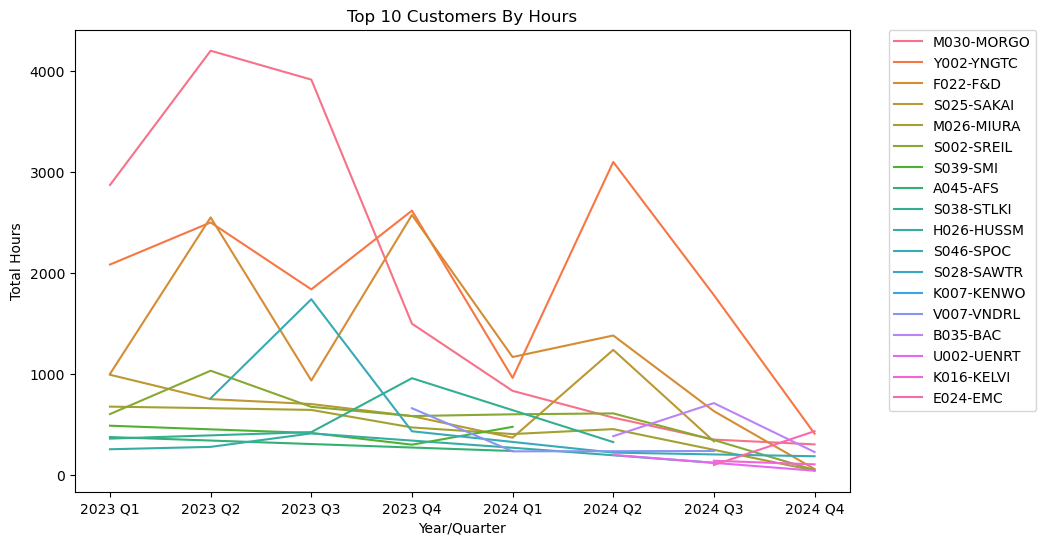

In [532]:
plt.figure(figsize=(10,6))

sns.lineplot(data= hours, x = 'year_quarterly', y='total_actual_hours', hue = 'jmp_customer_organization_id')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);
plt.title('Top 10 Customers By Hours')
plt.ylabel('Total Hours')
plt.xlabel('Year/Quarter')

Text(0.5, 0, 'Year/Quarter')

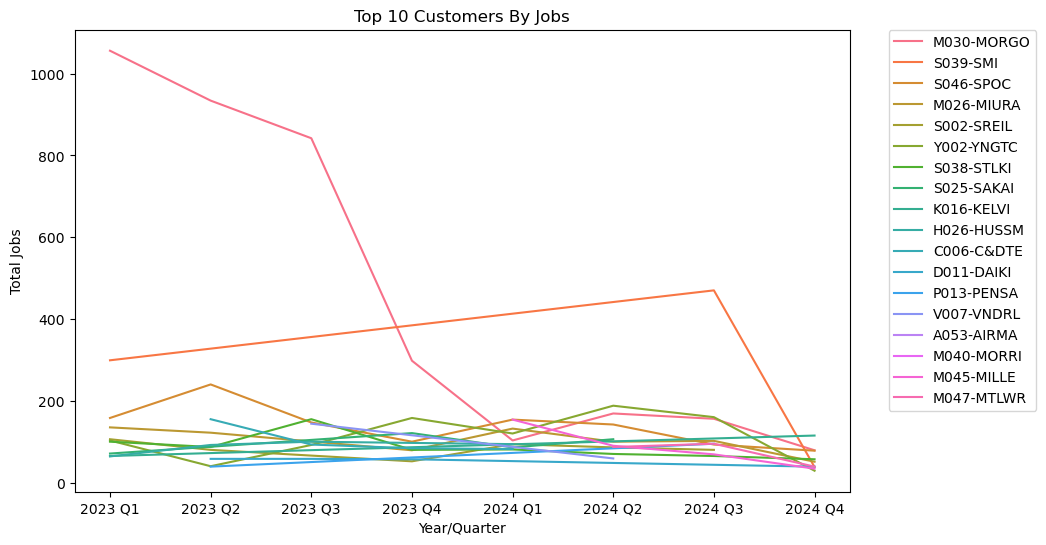

In [534]:
plt.figure(figsize=(10,6))

sns.lineplot(data= jobs, x = 'year_quarterly', y='jmp_job_id', hue = 'jmp_customer_organization_id')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);
plt.title('Top 10 Customers By Jobs')
plt.ylabel('Total Jobs')
plt.xlabel('Year/Quarter')

Text(0.5, 0, 'Year/Quarter')

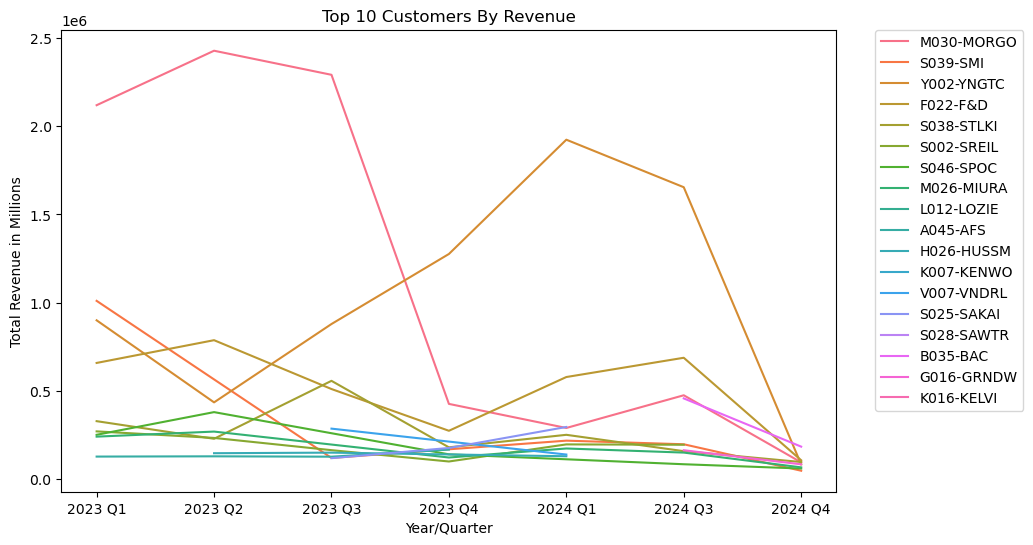

In [540]:
plt.figure(figsize=(10,6))

sns.lineplot(data= revenue, x = 'year_quarterly', y='omp_full_order_subtotal_base', hue = 'omp_customer_organization_id')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);
plt.title('Top 10 Customers By Revenue')
plt.ylabel('Total Revenue in Millions')
plt.xlabel('Year/Quarter')

In [538]:
revenue.head(5)

,year,quarter,omp_customer_organization_id,omp_full_order_subtotal_base,year_quarterly
33,2023,1,M030-MORGO,2119290.90,2023 Q1
52,2023,1,S039-SMI,1009881.24,2023 Q1
67,2023,1,Y002-YNGTC,899580.27,2023 Q1
17,2023,1,F022-F&D,657841.42,2023 Q1
51,2023,1,S038-STLKI,327702.59,2023 Q1
